# Analyse des données de systèmes éducatifs

Etude data - Projet 2 Nalron (Septembre 2020) OpenClassrooms / CentraleSupélec

Traitement des données sur Jupyter Notebook (Distribution Anaconda)

Etude réalisée en langage Python

Data source : [Données de la Banque mondiale](https://datacatalog.worldbank.org/dataset/education-statistics)

---

## Décisions d'ouverture vers de nouveaux pays : quels indicateurs? quels pays?

Condition sine qua non aux pays cibles _un accès à Internet_.
Quelque soit la décision de l'entreprise, quelque soit la stratégie de développement à l'international, si le positionnement "Cours en ligne" est maintenu, sans implantation local par des espaces physiques pouvant accueillir les apprenants, l'accessibilité à Internet est la condition indispensable à la croissance Internationale visée.

**- IT.NET.USER.P2 : Taux d'accès à internet (pour 100 personnes)**

Derrière cette première approche technologique, le choix d'un pays ou d'une zone plus large (continent par exemple),
peut se mesurer par la richesse de la population : _PIB par habitant_

**- NY.GDP.PCAP.CD : PIB par habitant (current US)**

Des critères démographiques peuvent également être analysés, la cible actuelle de l'entreprise étant une population jeune type lycéen et universitaire : 

**- SP.POP.TOTL : Population Totale**\
**- SP.POP.1524.TO.UN : Population âges 15-24**

Pour finir, il reste indispensable de pouvoir prendre en compte un critère purement sectoriel (métier), ici l'éducation au sens large du terme, c'est à dire sans spécialisation, ni notion de niveau, de matières, de métier, etc… 

**- UIS.E.4 : Inscription dans l'enseignement post-secondaire non tertiaire les deux sexes (nombre)**\
**- UIS.E.3 : Inscription dans l'enseignement secondaire supérieur les deux sexes (nombre)**\
**- SE.TER.ENRL : Inscription dans l'enseignement supérieur, tous les programmes, les deux sexes (nombre)**

**Notion d'évolution dans les prochaines années avec l'indicateur : PRJ.POP.ALL.4.MF**\
"Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary."\
Cet indicateur pourra servir de repère pour les années futures. En effet, l'indicateur donne une projection sur l'évolution de la réussite en enseignement supérieur. Dans notre contexte, on pourra prendre un intervalle de 10 ans, de 2020 à 2030 par exemple.

In [56]:
indicators = [ #Checklist of selected indicators
    'IT.NET.USER.P2',
    'NY.GDP.PCAP.CD',
    'SP.POP.TOTL',
    'SP.POP.1524.TO.UN',
    'UIS.E.3',
    'UIS.E.4',
    'SE.TER.ENRL']

In [57]:
#Counting indicators available between 2000 & 2015
data_academy = data[['Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005',
                    '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
data_academy = data_academy[data_academy['Indicator Code'].isin(indicators)]
data_academy = data_academy.groupby(['Indicator Name', 'Indicator Code']).count().reset_index()
data_academy

,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,111,113,103,106,103,100,95,101,100,98,95,96,99,108,88,2
1,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,149,148,158,159,159,154,154,154,159,162,165,167,166,156,149,116
2,"Enrolment in upper secondary education, both s...",UIS.E.3,173,174,175,171,182,182,175,180,177,177,174,179,177,165,143,7
3,GDP per capita (current US$),NY.GDP.PCAP.CD,224,224,228,228,229,229,230,229,228,227,228,228,224,225,219,218
4,Internet users (per 100 people),IT.NET.USER.P2,221,222,224,218,221,223,222,229,228,227,227,229,227,226,223,223
5,"Population, ages 15-24, total",SP.POP.1524.TO.UN,190,191,192,192,191,191,187,181,181,181,181,181,181,181,181,181
6,"Population, total",SP.POP.TOTL,240,240,240,240,240,240,240,240,240,240,240,240,239,239,232,232


Nos 3 indicateurs métiers, ne semblent pas disposer de la totalités des valeurs pour l'année 2015, à exclure de l'analyse.\
Par conséquent, **l'analyse sera faite sur les années 2000 à 2014**.

In [58]:
df = pd.merge(data, country[['Country Code', 'Region', 'Currency Unit']], how='left', on='Country Code')

In [59]:
df = df[df['Indicator Code'].isin(indicators)]

In [60]:
df['cumul_years'] = df[['2000', '2001', '2002', '2003', '2004', '2005', '2006', 
                        '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']].sum(axis=1, skipna=True)

In [61]:
df = df[['Country Name', 'Country Code', 'Region', 'Currency Unit', 'Indicator Name', 
         'Indicator Code', 'cumul_years']]
df

,Country Name,Country Code,Region,Currency Unit,Indicator Name,Indicator Code,cumul_years
1171,Arab World,ARB,NaN,NaN,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,4.254872e+06
1204,Arab World,ARB,NaN,NaN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.129140e+08
1214,Arab World,ARB,NaN,NaN,"Enrolment in upper secondary education, both s...",UIS.E.3,1.585850e+08
1245,Arab World,ARB,NaN,NaN,GDP per capita (current US$),NY.GDP.PCAP.CD,6.665868e+04
1375,Arab World,ARB,NaN,NaN,Internet users (per 100 people),IT.NET.USER.P2,2.192053e+02
2482,Arab World,ARB,NaN,NaN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,0.000000e+00
2533,Arab World,ARB,NaN,NaN,"Population, total",SP.POP.TOTL,4.508976e+09
4836,East Asia & Pacific,EAS,NaN,NaN,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.907668e+07
4869,East Asia & Pacific,EAS,NaN,NaN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,6.921740e+08
4879,East Asia & Pacific,EAS,NaN,NaN,"Enrolment in upper secondary education, both s...",UIS.E.3,9.012645e+08


Notons que la variable 'Region' recense des valeurs manquantes en relation avec les modalités de 'Country Name' (ou Country Code) ayant pour référence non pas des pays, mais des groupements comme par exemple (Arab World, Euro area, High income, etc...). Il est donc nécessaire de supprimer ces observations pour éviter des doublons mais aussi des outliers.

In [62]:
df.dropna(subset=['Region'], axis=0, inplace=True)

In [63]:
df = df[df['cumul_years'] > 0]

A ce stade de l'analyse, sans sélection plus fine, **il n'est pas recommandé d'analyser nos variables selon les pays de l'échantillon**, la compréhension n'en serait que médiocre. Seulement, par zones géographiques (Region), on peut faire ressortir les premieres mesures de dispersion en exploitant nos données par Boxplot (boîtes à moustaches en Français).

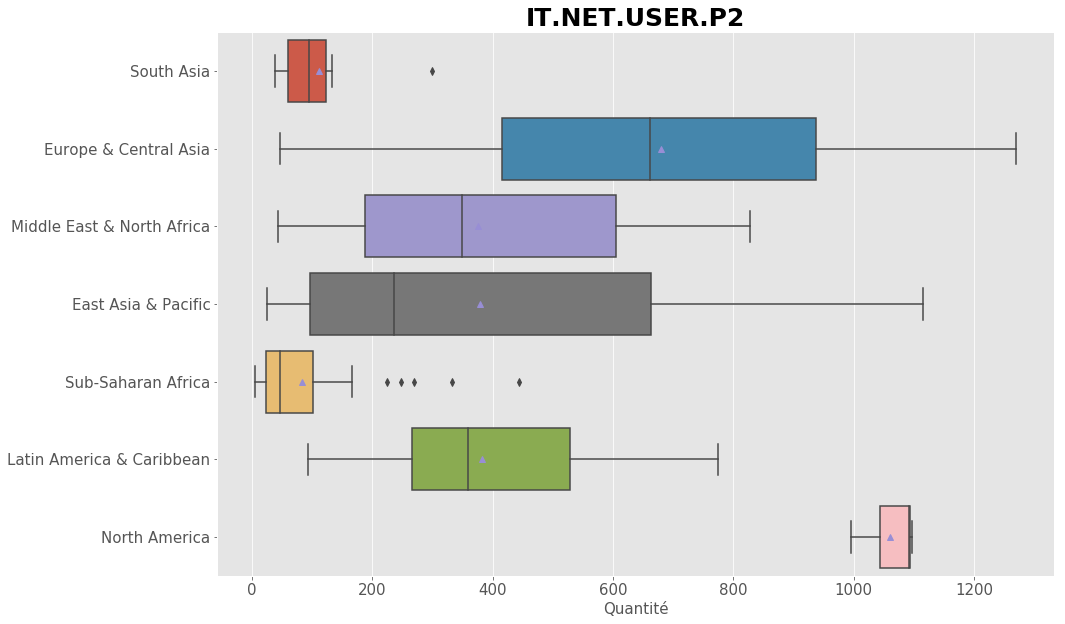

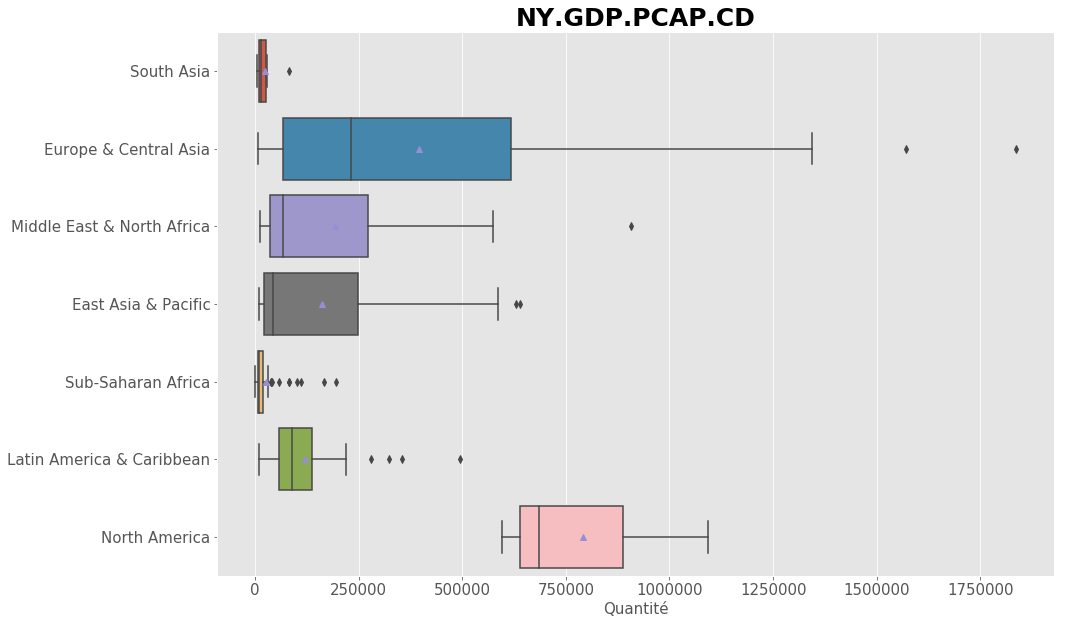

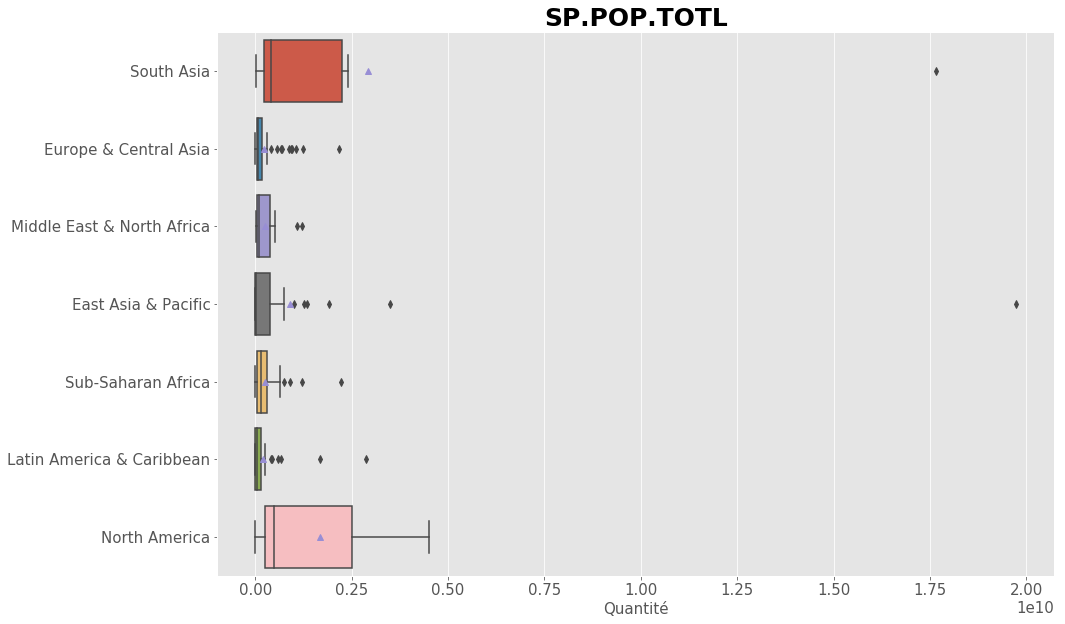

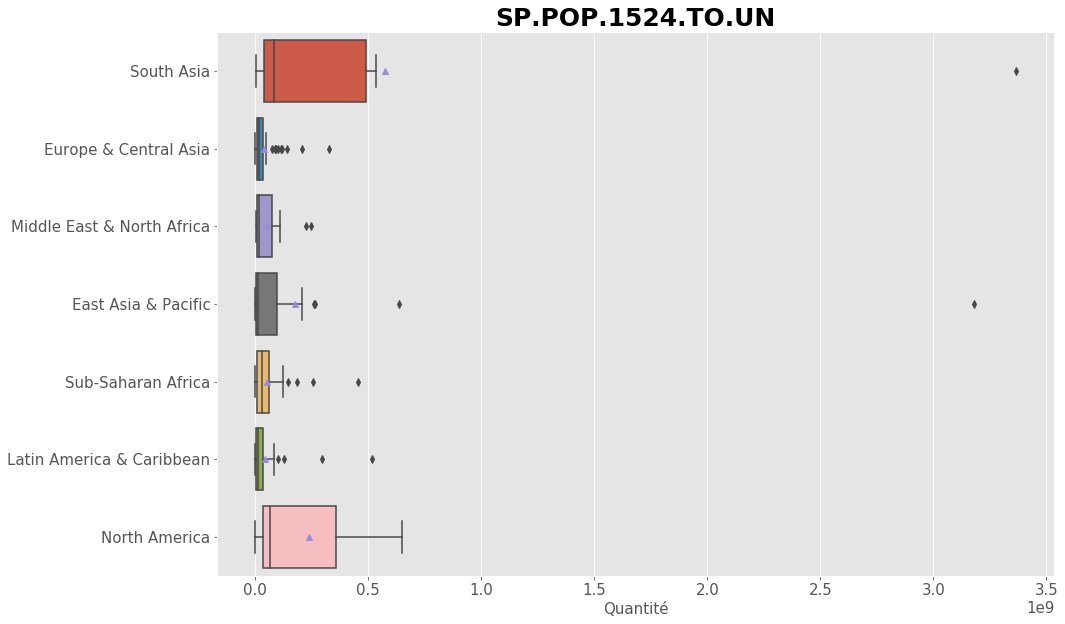

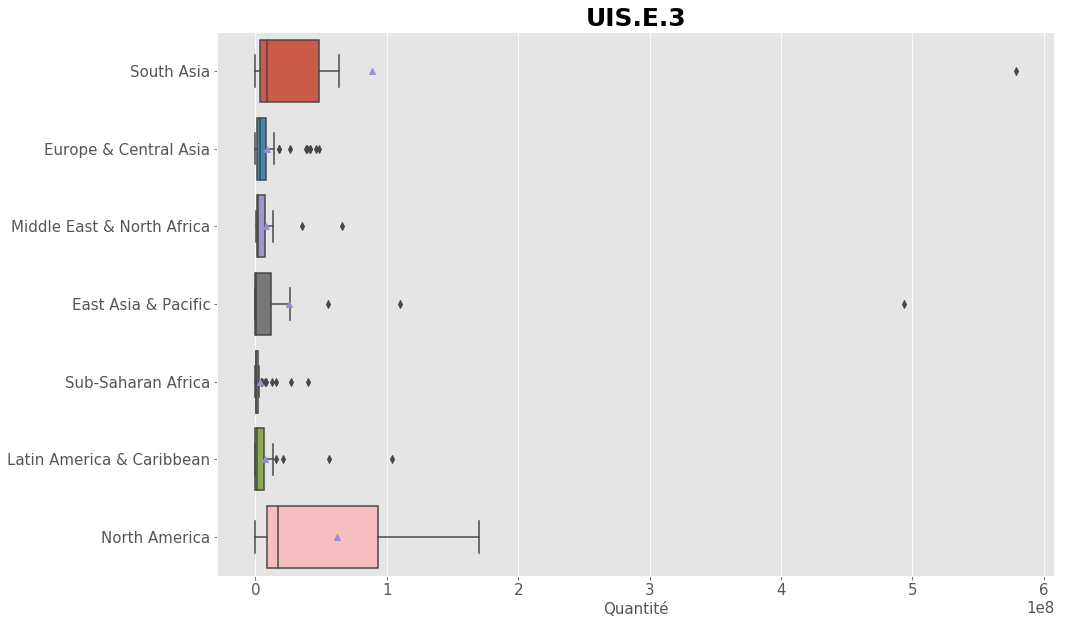

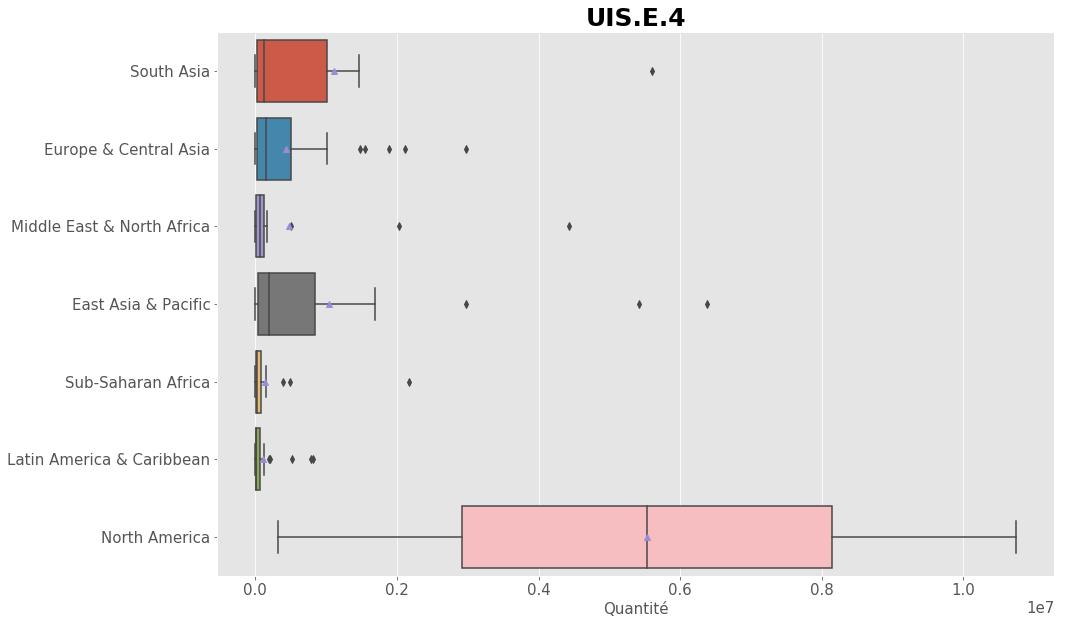

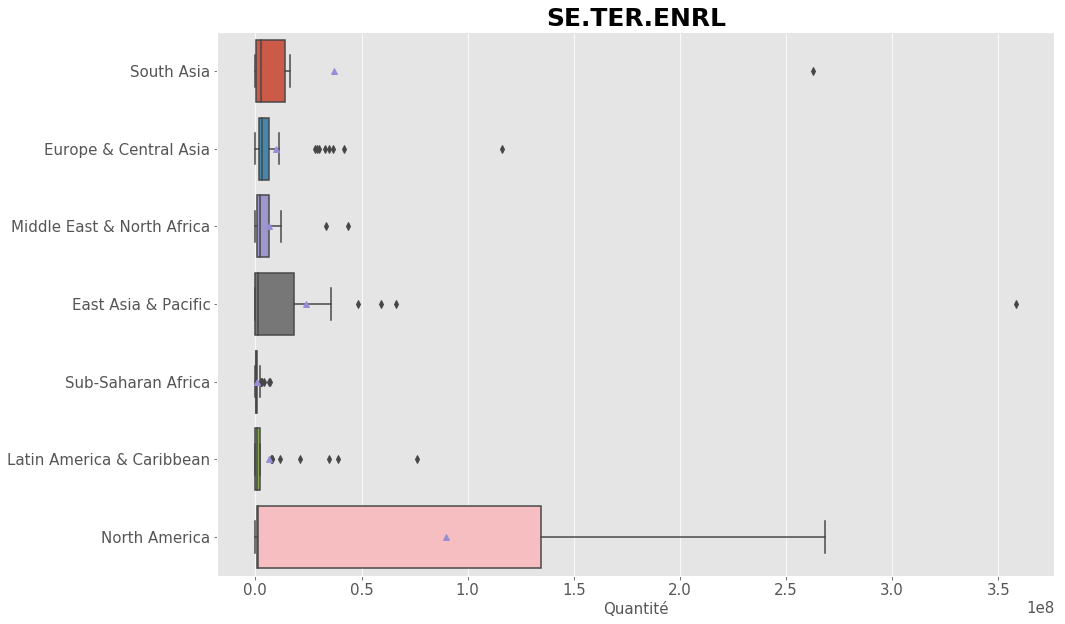

In [65]:
for i, name in zip(indicators, df['Indicator Name'].unique()) :
    sns.boxplot(data=df, x=df[df['Indicator Code'] == i]['cumul_years'], y= 'Region', showmeans=True)
    plt.title(i)
    plt.xlabel('Quantité')
    plt.ylabel('')

    plt.savefig('p2_00_graphic/boxplot_' + i + '.png')
    plt.show()

In [66]:
region_mean = df[df['Indicator Code'].isin(indicators)]
region_mean = region_mean.pivot_table(index='Region', columns='Indicator Code', 
                                      values='cumul_years', 
                                      aggfunc='mean').reset_index()
region_mean

Indicator Code,Region,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,SP.POP.TOTL,UIS.E.3,UIS.E.4
0,East Asia & Pacific,379.299863,161901.941107,2.395051e+07,1.749074e+08,8.898658e+08,2.590999e+07,1.037147e+06
1,Europe & Central Asia,679.502809,396098.640789,9.538724e+06,3.858897e+07,2.315592e+08,8.933412e+06,4.377339e+05
2,Latin America & Caribbean,383.083264,120049.957562,6.188257e+06,4.449309e+07,2.103232e+08,7.411199e+06,1.122108e+05
3,Middle East & North Africa,375.564801,193611.084823,6.606025e+06,5.282638e+07,2.615392e+08,8.225265e+06,4.735776e+05
4,North America,1060.915132,790842.553716,8.981394e+07,2.381603e+08,1.669911e+09,6.241189e+07,5.531707e+06
5,South Asia,111.238647,23166.697887,3.715507e+07,5.751262e+08,2.921328e+09,8.870475e+07,1.114222e+06
6,Sub-Saharan Africa,82.825092,26654.910487,9.000697e+05,5.254422e+07,2.538349e+08,3.201480e+06,1.405623e+05


In [67]:
from sklearn import preprocessing
X = region_mean.iloc[:, 1:].values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pd.DataFrame(data= X_scaled, index=region_mean['Region'], columns=indicators)

,IT.NET.USER.P2,NY.GDP.PCAP.CD,SP.POP.TOTL,SP.POP.1524.TO.UN,UIS.E.3,UIS.E.4,SE.TER.ENRL
Region,,,,,,,
East Asia & Pacific,-0.189944,-0.328872,-0.032084,0.037653,-0.031213,-0.108538,-0.127365
Europe & Central Asia,0.766497,0.602274,-0.530115,-0.715502,-0.718425,-0.659083,-0.464079
Latin America & Caribbean,-0.177890,-0.495272,-0.645897,-0.682882,-0.740593,-0.708447,-0.646938
Middle East & North Africa,-0.201844,-0.202799,-0.631461,-0.636841,-0.687128,-0.682047,-0.443944
North America,1.981669,2.171741,2.243971,0.387123,0.783083,1.075207,2.397405
South Asia,-1.043982,-0.880471,0.424228,2.248850,2.089447,1.927876,-0.084069
Sub-Saharan Africa,-1.134507,-0.866602,-0.828642,-0.638400,-0.695171,-0.844967,-0.631011


**Les variables propres à l'éducation ont une grande variance** alors que d'autres comme celles des populations varient peu en proportion. On peut identifier quelques valeurs atypiques en queue de distribution. Vérifions ces outliers…

In [68]:
#IT.NET.USER.P2 Outliers 
df[df['Indicator Code'] == "IT.NET.USER.P2"].sort_values('cumul_years', ascending=False)[:10]

,Country Name,Country Code,Region,Currency Unit,Indicator Name,Indicator Code,cumul_years
411855,Iceland,ISL,Europe & Central Asia,Iceland krona,Internet users (per 100 people),IT.NET.USER.P2,1270.239816
628090,Norway,NOR,Europe & Central Asia,Norwegian krone,Internet users (per 100 people),IT.NET.USER.P2,1251.663361
778355,Sweden,SWE,Europe & Central Asia,Swedish krona,Internet users (per 100 people),IT.NET.USER.P2,1229.896891
287245,Denmark,DNK,Europe & Central Asia,Danish krone,Internet users (per 100 people),IT.NET.USER.P2,1191.259681
602435,Netherlands,NLD,Europe & Central Asia,Euro,Internet users (per 100 people),IT.NET.USER.P2,1175.710468
334890,Finland,FIN,Europe & Central Asia,Euro,Internet users (per 100 people),IT.NET.USER.P2,1128.998611
470495,"Korea, Rep.",KOR,East Asia & Pacific,Korean won,Internet users (per 100 people),IT.NET.USER.P2,1115.755947
782020,Switzerland,CHE,Europe & Central Asia,Swiss franc,Internet users (per 100 people),IT.NET.USER.P2,1108.033028
221275,Canada,CAN,North America,Canadian dollar,Internet users (per 100 people),IT.NET.USER.P2,1096.729263
169965,Bermuda,BMU,North America,Bermuda dollar,Internet users (per 100 people),IT.NET.USER.P2,1091.196656


In [69]:
#NY.GDP.PCAP.CD Outliers 
df[df['Indicator Code'] == "NY.GDP.PCAP.CD"].sort_values('cumul_years', ascending=False)[:10]

,Country Name,Country Code,Region,Currency Unit,Indicator Name,Indicator Code,cumul_years
507015,Liechtenstein,LIE,Europe & Central Asia,Swiss franc,GDP per capita (current US$),NY.GDP.PCAP.CD,1.836727e+06
569320,Monaco,MCO,Europe & Central Asia,Euro,GDP per capita (current US$),NY.GDP.PCAP.CD,1.570213e+06
514345,Luxembourg,LUX,Europe & Central Asia,Euro,GDP per capita (current US$),NY.GDP.PCAP.CD,1.344875e+06
627960,Norway,NOR,Europe & Central Asia,Norwegian krone,GDP per capita (current US$),NY.GDP.PCAP.CD,1.120984e+06
169835,Bermuda,BMU,North America,Bermuda dollar,GDP per capita (current US$),NY.GDP.PCAP.CD,1.092323e+06
781890,Switzerland,CHE,Europe & Central Asia,Swiss franc,GDP per capita (current US$),NY.GDP.PCAP.CD,9.559918e+05
690265,San Marino,SMR,Europe & Central Asia,Euro,GDP per capita (current US$),NY.GDP.PCAP.CD,9.406704e+05
671940,Qatar,QAT,Middle East & North Africa,Qatari riyal,GDP per capita (current US$),NY.GDP.PCAP.CD,9.075759e+05
433715,Isle of Man,IMN,Europe & Central Asia,Pound sterling,GDP per capita (current US$),NY.GDP.PCAP.CD,8.366369e+05
287115,Denmark,DNK,Europe & Central Asia,Danish krone,GDP per capita (current US$),NY.GDP.PCAP.CD,7.655362e+05


In [70]:
#SP.POP.TOTL Outliers 
df[df['Indicator Code'] == "SP.POP.TOTL"].sort_values('cumul_years', ascending=False)[:10]

,Country Name,Country Code,Region,Currency Unit,Indicator Name,Indicator Code,cumul_years
244423,China,CHN,East Asia & Pacific,Chinese yuan,"Population, total",SP.POP.TOTL,1.974209e+10
416678,India,IND,South Asia,Indian rupee,"Population, total",SP.POP.TOTL,1.765940e+10
849148,United States,USA,North America,U.S. dollar,"Population, total",SP.POP.TOTL,4.513441e+09
420343,Indonesia,IDN,East Asia & Pacific,Indonesian rupiah,"Population, total",SP.POP.TOTL,3.497033e+09
189448,Brazil,BRA,Latin America & Caribbean,Brazilian real,"Population, total",SP.POP.TOTL,2.857907e+09
636578,Pakistan,PAK,South Asia,Pakistani rupee,"Population, total",SP.POP.TOTL,2.415208e+09
621918,Nigeria,NGA,Sub-Saharan Africa,Nigerian naira,"Population, total",SP.POP.TOTL,2.213611e+09
149133,Bangladesh,BGD,South Asia,Bangladeshi taka,"Population, total",SP.POP.TOTL,2.196579e+09
680558,Russian Federation,RUS,Europe & Central Asia,Russian ruble,"Population, total",SP.POP.TOTL,2.157833e+09
449663,Japan,JPN,East Asia & Pacific,Japanese yen,"Population, total",SP.POP.TOTL,1.914907e+09


In [71]:
#SP.POP.1524.TO.UN Outliers 
df[df['Indicator Code'] == "SP.POP.1524.TO.UN"].sort_values('cumul_years', ascending=False)[:10]

,Country Name,Country Code,Region,Currency Unit,Indicator Name,Indicator Code,cumul_years
416627,India,IND,South Asia,Indian rupee,"Population, ages 15-24, total",SP.POP.1524.TO.UN,3.366739e+09
244372,China,CHN,East Asia & Pacific,Chinese yuan,"Population, ages 15-24, total",SP.POP.1524.TO.UN,3.178825e+09
849097,United States,USA,North America,U.S. dollar,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6.489506e+08
420292,Indonesia,IDN,East Asia & Pacific,Indonesian rupiah,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6.366512e+08
636527,Pakistan,PAK,South Asia,Pakistani rupee,"Population, ages 15-24, total",SP.POP.1524.TO.UN,5.357461e+08
189397,Brazil,BRA,Latin America & Caribbean,Brazilian real,"Population, ages 15-24, total",SP.POP.1524.TO.UN,5.170949e+08
149082,Bangladesh,BGD,South Asia,Bangladeshi taka,"Population, ages 15-24, total",SP.POP.1524.TO.UN,4.765202e+08
621867,Nigeria,NGA,Sub-Saharan Africa,Nigerian naira,"Population, ages 15-24, total",SP.POP.1524.TO.UN,4.543606e+08
680507,Russian Federation,RUS,Europe & Central Asia,Russian ruble,"Population, ages 15-24, total",SP.POP.1524.TO.UN,3.254457e+08
559562,Mexico,MEX,Latin America & Caribbean,Mexican peso,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.950318e+08


In [72]:
#UIS.E.3 Outliers 
df[df['Indicator Code'] == "UIS.E.3"].sort_values('cumul_years', ascending=False)[:10]

,Country Name,Country Code,Region,Currency Unit,Indicator Name,Indicator Code,cumul_years
415359,India,IND,South Asia,Indian rupee,"Enrolment in upper secondary education, both s...",UIS.E.3,579046072.0
243104,China,CHN,East Asia & Pacific,Chinese yuan,"Enrolment in upper secondary education, both s...",UIS.E.3,493472664.0
847829,United States,USA,North America,U.S. dollar,"Enrolment in upper secondary education, both s...",UIS.E.3,170174519.0
419024,Indonesia,IDN,East Asia & Pacific,Indonesian rupiah,"Enrolment in upper secondary education, both s...",UIS.E.3,109977804.0
188129,Brazil,BRA,Latin America & Caribbean,Brazilian real,"Enrolment in upper secondary education, both s...",UIS.E.3,103863625.0
422689,"Iran, Islamic Rep.",IRN,Middle East & North Africa,Iranian rial,"Enrolment in upper secondary education, both s...",UIS.E.3,65799966.0
147814,Bangladesh,BGD,South Asia,Bangladeshi taka,"Enrolment in upper secondary education, both s...",UIS.E.3,63512230.5
558294,Mexico,MEX,Latin America & Caribbean,Mexican peso,"Enrolment in upper secondary education, both s...",UIS.E.3,56113555.0
448344,Japan,JPN,East Asia & Pacific,Japanese yen,"Enrolment in upper secondary education, both s...",UIS.E.3,55538552.0
844164,United Kingdom,GBR,Europe & Central Asia,Pound sterling,"Enrolment in upper secondary education, both s...",UIS.E.3,48100178.5


In [73]:
#UIS.E.4 Outliers 
df[df['Indicator Code'] == "UIS.E.4"].sort_values('cumul_years', ascending=False)[:10]

,Country Name,Country Code,Region,Currency Unit,Indicator Name,Indicator Code,cumul_years
847786,United States,USA,North America,U.S. dollar,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,1.074961e+07
243061,China,CHN,East Asia & Pacific,Chinese yuan,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,6.387035e+06
415316,India,IND,South Asia,Indian rupee,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,5.601529e+06
657206,Philippines,PHL,East Asia & Pacific,Philippine peso,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,5.417082e+06
422646,"Iran, Islamic Rep.",IRN,Middle East & North Africa,Iranian rial,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,4.431096e+06
129446,Australia,AUS,East Asia & Pacific,Australian dollar,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.972574e+06
356676,Germany,DEU,Europe & Central Asia,Euro,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.969445e+06
737836,South Africa,ZAF,Sub-Saharan Africa,South African rand,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.168056e+06
836791,Ukraine,UKR,Europe & Central Asia,Ukrainian hryvnia,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.109853e+06
305366,"Egypt, Arab Rep.",EGY,Middle East & North Africa,Egyptian pound,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,2.025251e+06


In [74]:
#SE.TER.ENRL Outliers 
df[df['Indicator Code'] == "SE.TER.ENRL"].sort_values('cumul_years', ascending=False)[:10]

,Country Name,Country Code,Region,Currency Unit,Indicator Name,Indicator Code,cumul_years
243094,China,CHN,East Asia & Pacific,Chinese yuan,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,358435580.0
847819,United States,USA,North America,U.S. dollar,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,268218748.0
415349,India,IND,South Asia,Indian rupee,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,262608702.0
679229,Russian Federation,RUS,Europe & Central Asia,Russian ruble,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,116139431.0
188119,Brazil,BRA,Latin America & Caribbean,Brazilian real,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,76013768.0
419014,Indonesia,IDN,East Asia & Pacific,Indonesian rupiah,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,66203911.0
448334,Japan,JPN,East Asia & Pacific,Japanese yen,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,59232557.0
470324,"Korea, Rep.",KOR,East Asia & Pacific,Korean won,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,48484012.0
422679,"Iran, Islamic Rep.",IRN,Middle East & North Africa,Iranian rial,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,43671692.0
818499,Turkey,TUR,Europe & Central Asia,New Turkish lira,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,41684458.0


**Notons qu'il n'y a pas de valeur aberrante.** On fait le constat de grandes Nations comme l'Inde, la Chine, la Corée ou encore les USA, les valeurs sont parfaitement plausibles.

Cette analyse est un peu limitée parce qu'elle ne permet pas de déterminer le lien entre nos différentes variables.  Pour approfondir la compréhension des données, une ACP (Analyse en Composantes Principales)sera mise en oeuvre.

In [75]:
country_evolution = data[['Country Name', 'Country Code', 'Indicator Code', '2020', '2025', '2030']]
country_evolution = country_evolution[country_evolution['Indicator Code'] == 'PRJ.POP.ALL.4.MF'].dropna()
country_evolution.reset_index(drop='all', inplace=True)
country_evolution.drop(index=0, inplace=True) #Suppression de l'observation 'World'
country_evolution.drop(columns='Indicator Code', inplace=True)
country_evolution.sort_values('2030', ascending=False, inplace=True)
print("Pays à forte perspective de réussite en enseignement supérieur")
country_evolution

Pays à forte perspective de réussite en enseignement supérieur


,Country Name,Country Code,2020,2025,2030
30,China,CHN,126496.96,145660.86,165561.25
67,India,IND,103612.78,123654.21,145784.61
159,United States,USA,94645.46,102980.85,111600.20
75,Japan,JPN,44038.31,47389.87,50517.55
118,Philippines,PHL,24478.47,29009.65,33650.46
124,Russian Federation,RUS,24781.98,25276.61,26077.18
55,Germany,DEU,22515.63,23989.77,25367.24
68,Indonesia,IDN,17437.94,20985.74,24959.68
112,Nigeria,NGA,14128.25,18587.25,24306.68
19,Brazil,BRA,18529.85,21283.16,24079.93


Notons que cette liste comparative de pays qui émettent le plus de perspectives d'ici 2030, pourra être utile pour identifier une short liste en fin d'analyse. Il sera pertinent d'affiner la sélection en fonction des clusters identifiés… Pour le moment, visualisons les performances d'ici 2030 non pas sur des observations pays mais via les zones géographiques. Vision moins fine, mais qui permet d'avoir une approche graphique globale par plot.

In [76]:
region_evolution = pd.merge(country_evolution, df[['Country Name', 'Region']], how='left', on='Country Name')
region_evolution = region_evolution.groupby('Region').sum().reset_index()
print("Zones géographiques à forte perspective de réussite en enseignement supérieur")
region_evolution

Zones géographiques à forte perspective de réussite en enseignement supérieur


,Region,2020,2025,2030
0,East Asia & Pacific,1850165.52,2118797.94,2393231.30
1,Europe & Central Asia,1137330.04,1228573.57,1328150.99
2,Latin America & Caribbean,469988.51,548117.95,630328.38
3,Middle East & North Africa,339678.36,414384.53,501020.00
4,North America,784697.97,853740.37,924778.26
5,South Asia,870726.41,1043118.70,1232696.05
6,Sub-Saharan Africa,198394.69,255777.14,327117.23


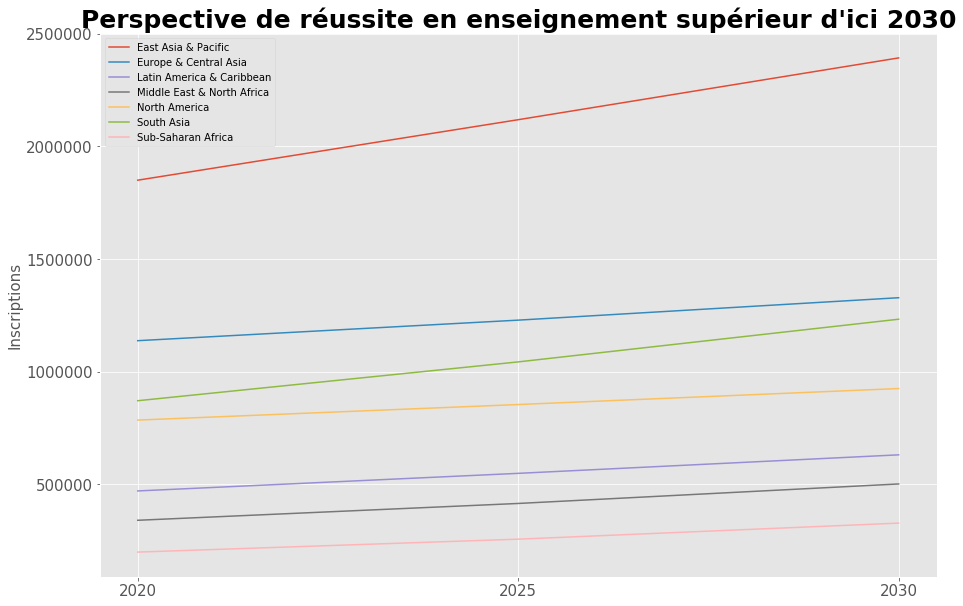

In [77]:
years = np.arange(2020, 2031, 5).astype(str)
for i in region_evolution.itertuples():
    plt.plot(years, region_evolution.loc[i[0],'2020':'2030'], label=region_evolution.loc[i[0],'Region'])

plt.title("Perspective de réussite en enseignement supérieur d'ici 2030")
plt.ylabel('Inscriptions')
plt.legend()
plt.savefig('p2_00_graphic/region_evolution.png')
plt.show()

Globalement l'ensemble des territoires devraient s'ouvrir à l'éducation supérieure, le graphique ci-dessus l'atteste par des perspectives en hausse quelque soit le continent, avec **une croissance plus marquée pour l'Asie de l'Est et Pacifique.**

#### Voyons maintenant comment traiter nos 7 indicateurs sélectionnés (stockés dans la variable 'indicators') de manière à cibler des pays plus attrayants que d'autres pour un développement "rapide" à court et moyen terme.

In [78]:
df_indicators = df.pivot_table(index=['Country Name', 'Country Code', 'Currency Unit'], 
                         columns='Indicator Code', 
                         values='cumul_years').reset_index().rename_axis(None, axis=1)
#df_indicators.columns.name = None
df_indicators.head()

,Country Name,Country Code,Currency Unit,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,SP.POP.TOTL,UIS.E.3,UIS.E.4
0,Afghanistan,AFG,Afghan afghani,38.178801,5504.733085,509422.0,81269137.0,396801806.0,6129824.0,561081.0
1,Albania,ALB,Albanian lek,365.928222,47836.417233,1393260.0,8737415.0,44618462.0,2167444.0,3778.0
2,Algeria,DZA,Algerian dinar,151.240413,55629.646556,12275503.0,107537031.0,519653289.0,13649727.0,NaN
3,American Samoa,ASM,U.S. dollar,NaN,129759.504407,1607.0,NaN,858667.0,NaN,NaN
4,Andorra,AND,Euro,806.500709,567066.339642,3633.0,54179.0,1173712.0,13692.0,3612.0


In [79]:
df_indicators.set_index('Country Name', inplace=True)
df_indicators.dropna(axis=0, inplace=True)
df_indicators.head()

,Country Code,Currency Unit,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.TER.ENRL,SP.POP.1524.TO.UN,SP.POP.TOTL,UIS.E.3,UIS.E.4
Country Name,,,,,,,,,
Afghanistan,AFG,Afghan afghani,38.178801,5504.733085,509422.0,81269137.0,396801806.0,6129824.0,561081.0
Albania,ALB,Albanian lek,365.928222,47836.417233,1393260.0,8737415.0,44618462.0,2167444.0,3778.0
Andorra,AND,Euro,806.500709,567066.339642,3633.0,54179.0,1173712.0,13692.0,3612.0
Antigua and Barbuda,ATG,East Caribbean dollar,528.556704,177271.659708,5067.0,77883.0,1371307.0,17940.0,9638.0
Aruba,ABW,Aruban florin,657.122823,280141.788190,28915.0,193343.0,1492667.0,50000.0,124.0


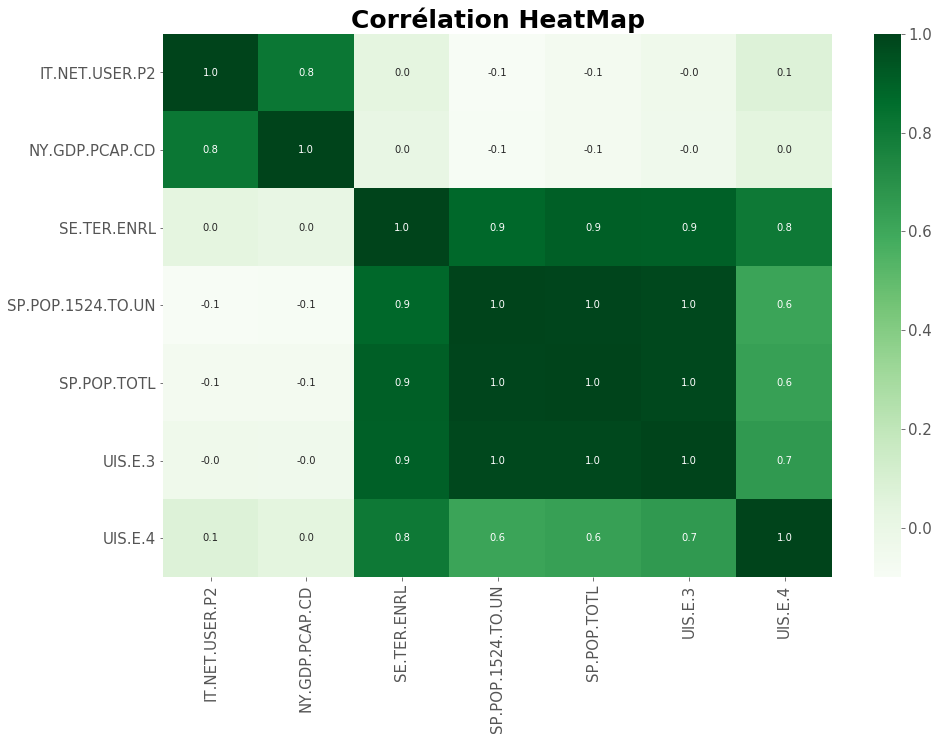

In [80]:
#Pearson linear correlation
sns.heatmap(df_indicators.corr(), annot=True, fmt=".1f", cmap='Greens')
plt.title('Corrélation HeatMap')
plt.savefig('p2_00_graphic/heatmap_global.png')
plt.show()

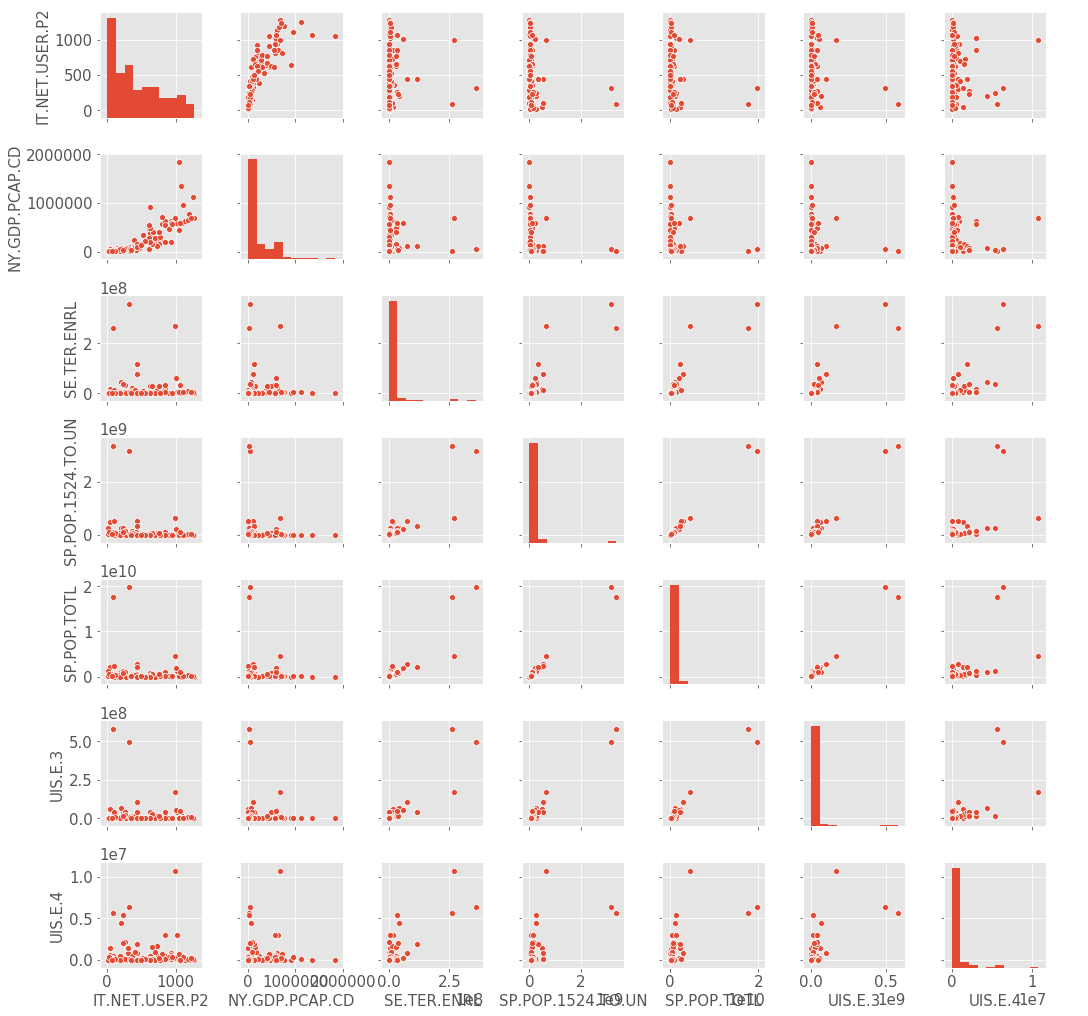

In [81]:
sns.pairplot(df_indicators, height=2)
plt.savefig('p2_00_graphic/pairplot.png')
plt.show()

Il existe effectivement des liens de corrélation linéaire suivant les couples de variables. Par exemple, il ressort clairement qu'au plus le PIB par habitant est élevé, au plus ces mêmes habitants disposent d'un accès à Internet. A priori, cela peut sembler intuitif, mais un cercle des corrélations permettra de grouper plus précisement ces rapports entre variables.